In [476]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [477]:
# Read the CSV file
data_science = pd.read_csv('C:\Jenny Pham\Advanced JRM\My Projects\Python\Data Science\data_science.csv')

# Drop unnecessary columns
data_science.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis = 1, inplace = True)

In [478]:
# Group the data by 'work_year' and calculate the mean of 'salary_in_usd' and round to two decimal places
df1 = data_science.groupby('work_year')['salary_in_usd'].mean().round(2)

# Create a dictionary to hold the year and the corresponding average salary
data = {
    'work_year' : df1.index,
    'average_salary' : df1.values
}

# Convert the dictionary into a new DataFrame
df1 = pd.DataFrame(data)

# Convert average salaries to thousands and round to two decimal places
df1['average_salary'] = (df1['average_salary']/1000).round(2)


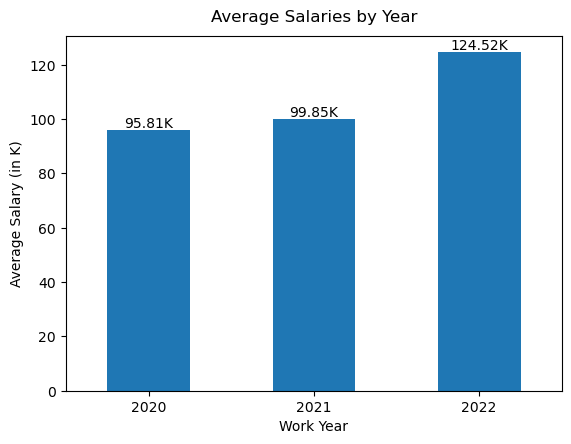

In [479]:
# Plot the bar chart
ax = df1.plot(kind='bar', x='work_year', y='average_salary', legend=False)

# Add bar labels with formatted values
ax.bar_label(ax.containers[0], labels=df1['average_salary'].map('{:.2f}K'.format))

# Adjust layout to avoid clipping
plt.subplots_adjust(top=0.85)

# Customize ticks and labels
plt.xticks(rotation=0)
plt.xlabel('Work Year')
plt.ylabel('Average Salary (in K)')
plt.title('Average Salaries by Year', pad=10)

# Show the plot
plt.show()


In [480]:
# Count the occurrences of each unique value in the 'remote_ratio' column
df2 = data_science.remote_ratio.value_counts()

# Convert the counts into a list to use for plotting 
values = df2.to_list()

# Define labels for the remote work categories
labels = ['Fully Remote', 'No Remote', 'Partitially Remote']

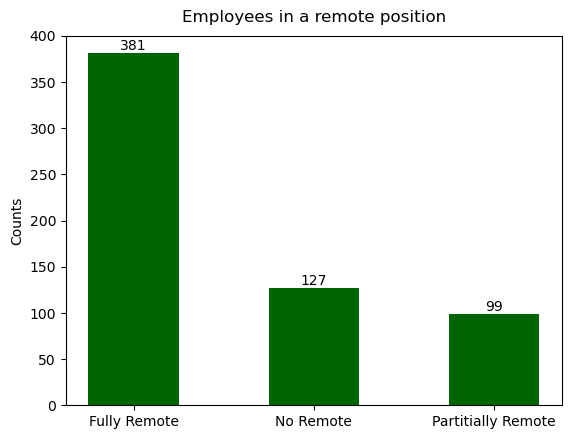

In [481]:
# Plot a bar chart
zx = plt.bar(labels, values, width = 0.5, color = 'DarkGreen')

# Add bar labels to display the counts on top of each bar
plt.bar_label(z, labels = values)

# Add title and labels
plt.title('Employees in a remote position', pad = 10)
plt.ylabel('Counts')

# Show the plot
plt.show()

In [482]:
# Count the occurrences of each unique value in the 'company_size' column
df3 = data_science.company_size.value_counts()

# Convert the index (unique company size categories) of the resulting Series into a list
df3.index.to_list()

# Extract the counts (frequencies) of each company size as a list of values
values2 = df3.values

# Define custom labels for the company sizes
labels_for_company = ['Medium', 'Large', 'Small']

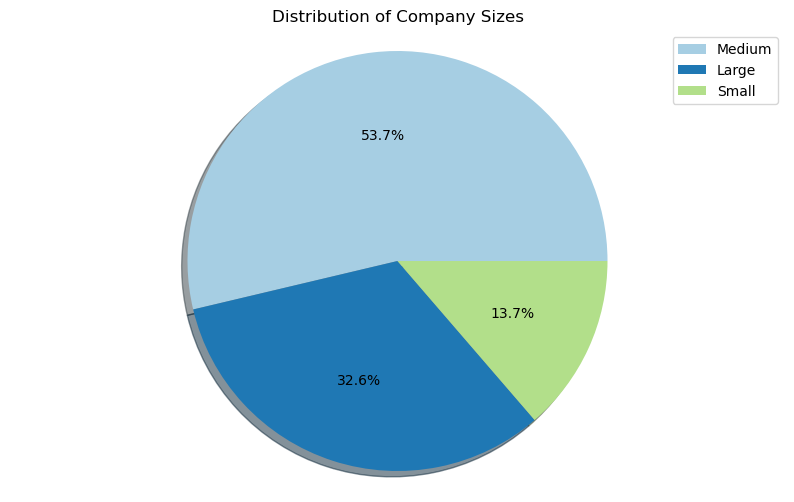

In [483]:
# Set the figure size for the pie chart
plt.figure(figsize = (10,6))

# Create a pie chart to visualize the distribution of company sizes
plt.pie(x = values2, labels = None, autopct = '%1.1f%%', shadow = True, colors = plt.cm.Paired.colors)
plt.axis('equal')

# Add a legend with the custom labels for company sizes
plt.legend(labels = labels_for_company, loc = 'upper right')

# Add a title to the chart
plt.title('Distribution of Company Sizes')

# Show the plot
plt.show()

In [484]:
# Count the occurrences of the top 5 most common job titles in the dataset
df4 = data_science.job_title.value_counts()[:5]

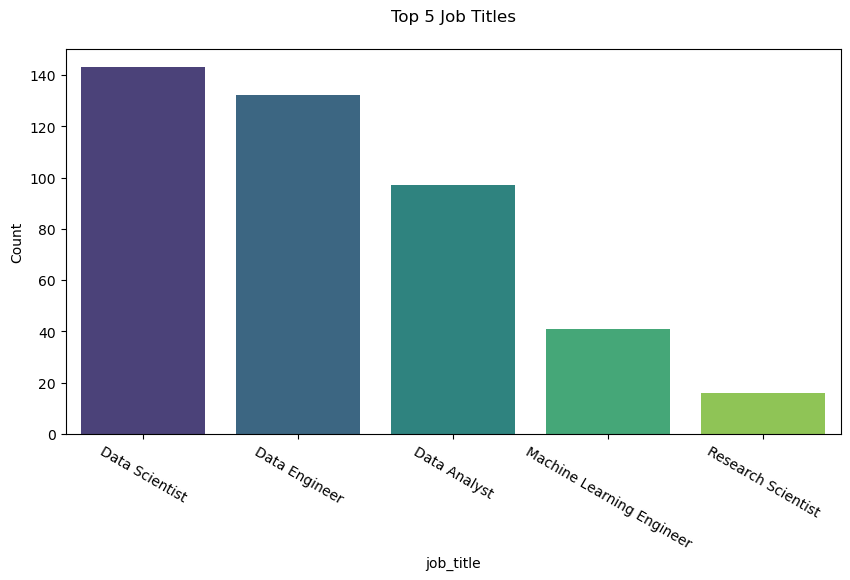

In [485]:
# Set the figure size for the bar plot (width = 10, height = 5)
plt.figure(figsize = (10,5))

# Create a bar plot using seaborn to visualize the top 5 job titles
sns.barplot(x = df4.index, y = df4.values, palette = 'viridis')
plt.ylabel('Count')

# Add a title to the chart
plt.title('Top 5 Job Titles', pad = 20)

# Rotate the x-axis labels by -30 degrees
plt.xticks(rotation = -30)

# Display the plot
plt.show()

In [486]:
# Create a new DataFrame with salary and company size columns
df5 = data_science[['salary_in_usd', 'company_size']]

# Filter the DataFrame for each company size (Small, Medium, Large)
S = df5[df5['company_size'] == 'S']
M = df5[df5['company_size'] == 'M']
L = df5[df5['company_size'] == 'L']

# Labels for the chart, representing the company sizes
labels = ['Medium', 'Large', 'Small']

# Calculate the mean salary for each company size group
sal_mean = [S['salary_in_usd'].mean(), M['salary_in_usd'].mean(), L['salary_in_usd'].mean()]

# Convert salary from USD to thousands (K) USD and round the values to 2 decimal places
label_change = np.round([x/1000 for x in sal_mean], 2)

# Convert the float values to strings
label_change = list(map(str, label_change))

# Append 'K' to the values to denote thousands
label_change = [x + 'K' for x in label_change]

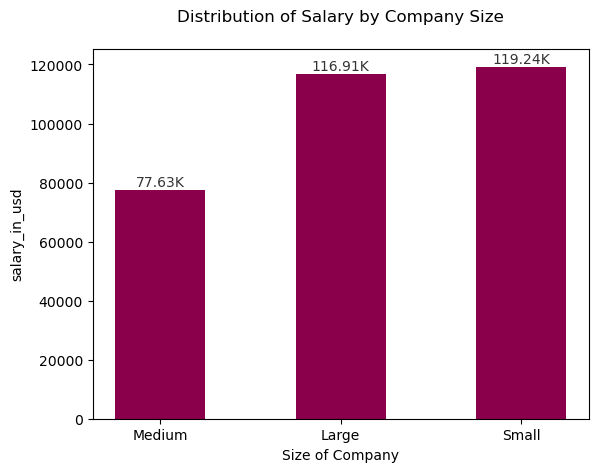

In [487]:
# Create a bar plot for average salary by company size
cx = plt.bar(labels, sal_mean, width = 0.5, color = '#8B004B')

# Add labels to the bars
plt.bar_label(cx, label_change, alpha = 0.8)

# Add the title for the plot with padding
plt.title('Distribution of Salary by Company Size', pad = 20)

# Set the x-axis, y-axis labels
plt.xlabel('Size of Company')
plt.ylabel('salary_in_usd')

# Show the plot
plt.show()

c:\Users\X\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\X\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\X\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


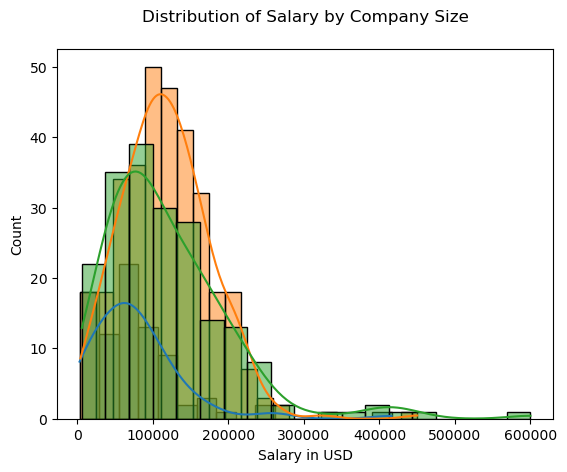

In [488]:
# Plot the distribution of salary for small, medium and large companies with KDE (Kernel Density Estimate) curve
sns.histplot(S['salary_in_usd'], label = 'Small', kde = True)
sns.histplot(M['salary_in_usd'], label = 'Medium', kde = True)
sns.histplot(L['salary_in_usd'], label = 'Large', kde = True)

# Set the title of the plot and add some padding above the title
plt.title('Distribution of Salary by Company Size', pad = 20)

# Label the x-axis
plt.xlabel('Salary in USD')

# Show the plot
plt.show()


In [489]:
# Get the count of each experience level in the dataset
df6 = data_science.experience_level.value_counts()

# Create a dictionary to map the original experience level codes to full names
exp_map = {
    'SE' : 'Senior',
    'MI' : 'Middle',
    'EN' : 'Entry Level',
    'EX' : 'Executive'
}

# Replace the experience level codes in the dataset with the full names
data_science['experience_level'].replace(exp_map, inplace=True)

# Get the list of experience levels from the index of the value_counts() result
exp = df6.index.to_list()

# Map the experience level codes to their full names for the pie chart
exp_full_names = [exp_map.get(level, level) for level in exp]

# Get the values (count of occurrences) of each experience level
values3 = df6.values

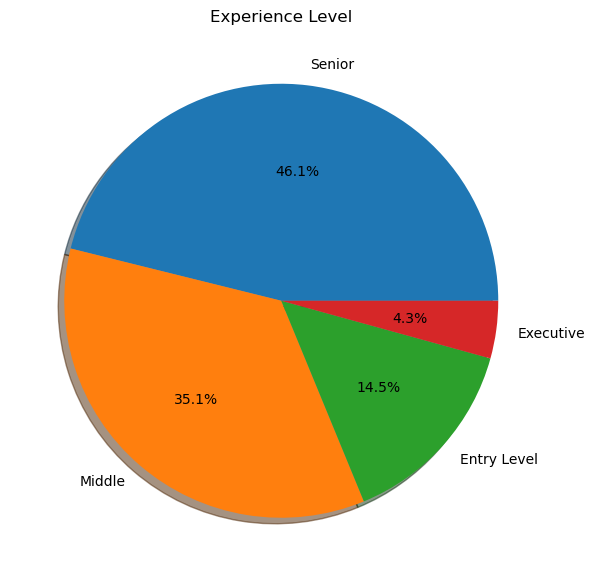

In [490]:
# Create a pie chart with specific figure size
plt.figure(figsize=(7, 12))

# Plot the pie chart with values and labels for experience levels
plt.pie(x=values3, labels=exp_full_names, autopct='%1.1f%%', shadow=True)

# Set the title of the pie chart
plt.title('Experience Level')

# Show the plot
plt.show()
